# 제3장 간단한 예제로 배우는 텐서플로의 기본

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf

**예제 코드3.1:텐서플로의 1+1**

In [2]:
a = tf.constant(1, name='a')
b = tf.constant(1, name='b')
c = a + b

with tf.Session() as sess:
    print(sess.run(c))

2


**예제 코드3.2:연산 결과의 데이터 형 조사**

In [3]:
a = tf.constant(1, name='a')
b = tf.constant(1, name='b')
c = a + b

print(c)

Tensor("add_1:0", shape=(), dtype=int32)


**예제 코드3.3:데이터 플로우 그래프의 정의 표시. 출력을 보면 a와 add가 노드로 되어 있는 것을 알 수 있다**

In [4]:
# 예제 코드3.3의 결과가 알기 쉽도록, 그래프를 리셋
tf.reset_default_graph()

In [5]:
a = tf.constant(1, name='a')
b = tf.constant(1, name='b')
c = a + b

graph = tf.get_default_graph()
print(graph.as_graph_def())

node {
  name: "a"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "b"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "add"
  op: "Add"
  input: "a"
  input: "b"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
versions {
  producer: 38
}



**예제 코드3.4:변수 예제**

In [6]:
a = tf.Variable(1, name='a')
b = tf.constant(1, name='b')
c = tf.assign(a, a + b)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    print('첫번째: [c, a] =', sess.run([c, a]))
    # 변수 c 가 갱신된다
    print('두번째: [c, a] =', sess.run([c, a])) 

첫번째: [c, a] = [2, 2]
두번째: [c, a] = [3, 3]


**예제 코드3.5:플레이스홀더 예제**

In [7]:
a = tf.placeholder(dtype=tf.int32, name='a')
b = tf.constant(1, name='b')
c = a + b

with tf.Session() as sess:
    print('a + b =', sess.run(c, feed_dict={a: 1}))

a + b = 2


**예제 코드3.6:연산 예제**

In [8]:
a = tf.constant(2, name='a')
b = tf.constant(3, name='b')
c = tf.add(a, b)  # a + b
d = tf.multiply(a, b)  # a*b

with tf.Session() as sess:
    print('a + b = ', sess.run(c))
    print('a * b = ', sess.run(d))

a + b =  5
a * b =  6


**예제 코드3.7:벡터 연산의 예**

In [9]:
a = tf.constant([1, 2, 3], name='a')
b = tf.constant([4, 5, 6], name='b')
c = a + b

with tf.Session() as sess:
    print('a + b = ', sess.run(c))

a + b =  [5 7 9]


**예제 코드3.8:행렬 연산의 예**

In [10]:
a = tf.constant([[1, 2], [3, 4]], name='a')
b = tf.constant([[1], [2]], name='b')
c = tf.matmul(a, b)

print('shape of a: ', a.shape)
print('shape of b: ', b.shape)
print('shape of c: ', c.shape)

with tf.Session() as sess:
    print('a = \n', sess.run(a))
    print('b = \n', sess.run(b))
    print('c = \n', sess.run(c))

shape of a:  (2, 2)
shape of b:  (2, 1)
shape of c:  (2, 1)
a = 
 [[1 2]
 [3 4]]
b = 
 [[1]
 [2]]
c = 
 [[ 5]
 [11]]


**예제 코드3.9:텐서의 플레이스홀더와 미지의 차원**

In [11]:
a = tf.placeholder(shape=(None, 2), dtype=tf.int32, name='a')

with tf.Session() as sess:
    print('-- [[1, 2]]를 대입 --')
    print('a = ', sess.run(a, feed_dict={a: [[1, 2]]}))
    
    print('\n-- [[1, 2], [3, 4]]를 대입 --')
    print('a = ', sess.run(a, feed_dict={a: [[1, 2], [3, 4]]}))

-- [[1, 2]]를 대입 --
a =  [[1 2]]

-- [[1, 2], [3, 4]]를 대입 --
a =  [[1 2]
 [3 4]]


**예제 코드3.10:세션이 바뀌면 변수가 초기화된다**

In [12]:
a = tf.Variable(1, name='a')
b = tf.assign(a, a + 1)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print('첫 번째 b = ', sess.run(b))
    print('두 번째 b = ', sess.run(b))

# 세션이 바뀌면 원래의 값으로 돌아가버린다
with tf.Session() as sess:
    print('-- 새로운 세션 --')
    sess.run(tf.global_variables_initializer())
    print('첫 번째 b = ', sess.run(b))
    print('두 번째 b = ', sess.run(b))

첫 번째 b =  2
두 번째 b =  3
-- 새로운 세션 --
첫 번째 b =  2
두 번째 b =  3


**예제 코드3.11:Saver로 변수 저장**

In [13]:
a = tf.Variable(1, name='a')
b = tf.assign(a, a + 1)

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(b))
    print(sess.run(b))

    # 변수의 값을 model/model.ckpt에 저장
    saver.save(sess, 'model/model.ckpt')

# model/model.ckpt로부터 변수의 값을 읽어 들임
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    saver.restore(sess, save_path='model/model.ckpt')
    print(sess.run(b))
    print(sess.run(b))

2
3
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from model/model.ckpt
4
5


**예제 코드3.13:경사하강법으로 2차원 함수 최소화**

In [14]:
# 파라미터는 변수로 정의
x = tf.Variable(0., name='x')

# 파라미터를 사용해서 최소화 하고 싶은 함수 정의
func = (x - 1)**2

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1) 

train_op = optimizer.minimize(func)

# train_step을 반복 실행
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(20):
        sess.run(train_op)
        
    print('x = ', sess.run(x))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
x =  0.98847073


**예제 코드3.15:케라스 임포트**

In [15]:
import keras

Using TensorFlow backend.


In [16]:
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()

**예제 코드3.16:히스토그램 표시**

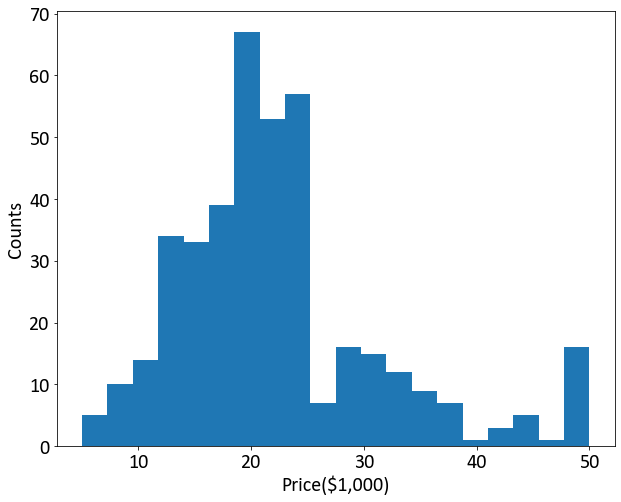

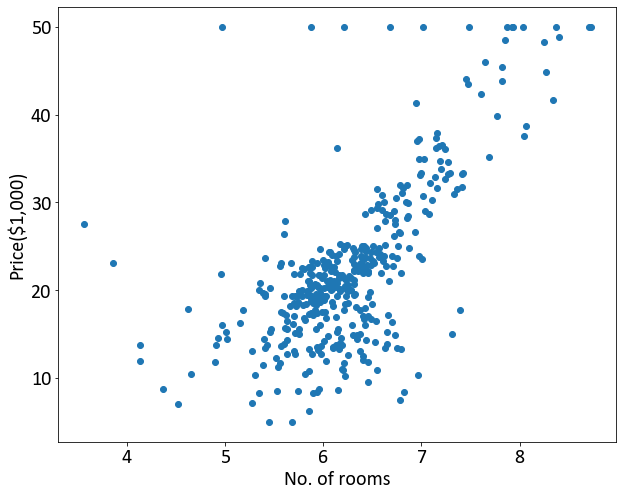

In [17]:
# matplotlib의 그래프를 실행한 브라우저에서 바로 볼 수 있게 함
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = ['Calibri']
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = [10, 8]

plt.hist(y_train, bins=20)
plt.xlabel('Price($1,000)')
plt.ylabel('Counts')
plt.show()

plt.plot(x_train[:, 5], y_train, 'o')
plt.xlabel('No. of rooms')
plt.ylabel('Price($1,000)')
plt.show()

**예제 코드3.17:데이터 표준화**

Text(0, 0.5, 'Price (Normalized)')

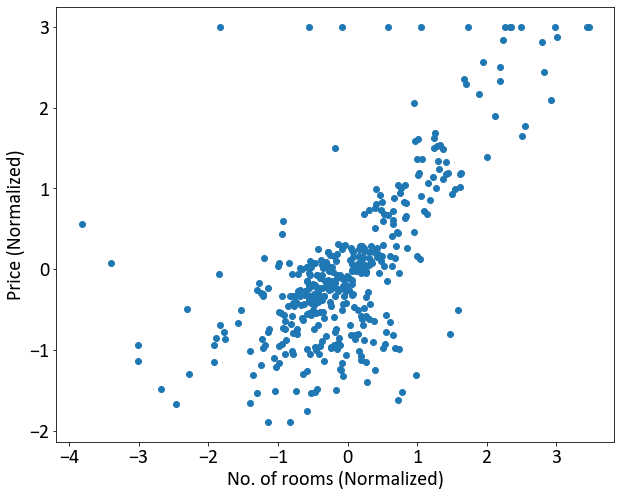

In [18]:
x_train_mean = x_train.mean(axis=0)
x_train_std = x_train.std(axis=0)
y_train_mean = y_train.mean()
y_train_std = y_train.std()

x_train = (x_train - x_train_mean)/x_train_std
y_train = (y_train - y_train_mean)/y_train_std

# test data도 train data의 평균과 표준편차로 정규화
x_test = (x_test - x_train_mean)/x_train_std
y_test = (y_test - y_train_mean)/y_train_std

plt.plot(x_train[:, 5], y_train, 'o')
plt.xlabel('No. of rooms (Normalized)')
plt.ylabel('Price (Normalized)')

**예제 코드3.18:주택가격을 추정하는 모델**

In [19]:
x = tf.placeholder(tf.float32, (None, 13), name='x')
y = tf.placeholder(tf.float32, (None, 1), name='y')

# 설명 변수와 가중치 w를 곱한 다음 전부 더한 간단한 모델
w = tf.Variable(tf.random_normal((13, 1)))
y_pred = tf.matmul(x, w)

**예제 코드3.19:오차의 정의와 train_step의 정의**

In [20]:
# 실제값과 추정값의 차이의 제곱의 평균(MSE)을 오차로 한다.
loss = tf.reduce_mean((y - y_pred)**2)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_step = optimizer.minimize(loss)

**예제 코드3.20:학습 루프**

In [21]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(200):
        # train_step 이 None 을 반환하기 때문에 _ 로 지정
        # y_train과 y의 차원을 맞추기위해서 reshape이 필요
        train_loss, _ = sess.run([loss, train_step],
                                 feed_dict={x: x_train, y: y_train.reshape(-1, 1)})
        
        if (step+1) % 10 == 0:
            print('step: {}, train_loss: {}'.format(step+1, train_loss))

    # 학습이 끝나면, 평가용 데이터로 예측해본다
    pred_ = sess.run(y_pred, feed_dict={x: x_test})

step: 10, train_loss: 1.2370853424072266
step: 20, train_loss: 0.5757550001144409
step: 30, train_loss: 0.39942964911460876
step: 40, train_loss: 0.325784295797348
step: 50, train_loss: 0.2921749949455261
step: 60, train_loss: 0.2763112783432007
step: 70, train_loss: 0.2686349153518677
step: 80, train_loss: 0.2648216485977173
step: 90, train_loss: 0.26286476850509644
step: 100, train_loss: 0.26181760430336
step: 110, train_loss: 0.2612271308898926
step: 120, train_loss: 0.2608734965324402
step: 130, train_loss: 0.2606480121612549
step: 140, train_loss: 0.26049572229385376
step: 150, train_loss: 0.26038771867752075
step: 160, train_loss: 0.26030832529067993
step: 170, train_loss: 0.26024845242500305
step: 180, train_loss: 0.2602024972438812
step: 190, train_loss: 0.26016688346862793
step: 200, train_loss: 0.26013901829719543


**그림3.12:평가용 데이터에 대한 실제값과 추정값**

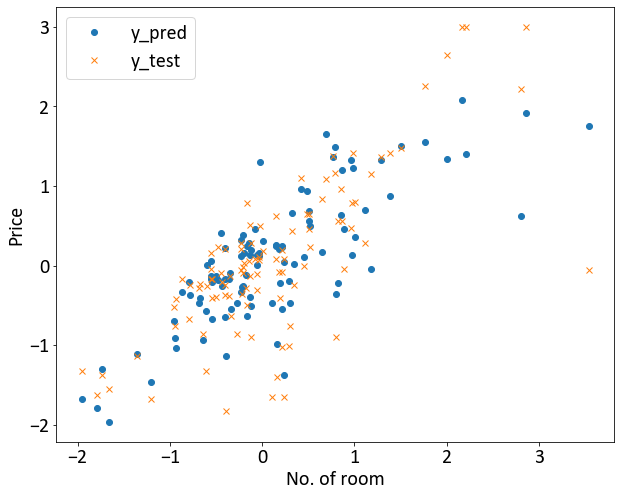

In [22]:
plt.plot(x_test[:, 5], pred_, 'o', label='y_pred')
plt.plot(x_test[:, 5], y_test, 'x', label='y_test')
plt.legend(loc='upper left')
plt.xlabel('No. of room')
plt.ylabel('Price')
plt.show()

**예제 코드3.21:미니배치를 1개씩 반환하는 생성기**

In [23]:
import numpy as np

In [24]:
def get_batches(x, y, batch_size):
    n_data = len(x)
    indices = np.arange(n_data)
    np.random.shuffle(indices)
    x_shuffled = x[indices]
    y_shuffled = y[indices]
    
    # 원래 데이터에서 임의로 bathc_size개씩 추출
    for i in range(0, n_data, batch_size):
        x_batch = x_shuffled[i: i + batch_size]
        y_batch = y_shuffled[i: i + batch_size]
        yield x_batch, y_batch

**예제 코드3.22:미니배치를 이용한 학습**

In [25]:
# 미니배치 사이즈
BATCH_SIZE = 64

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(200):
        t_loss = []
        for x_batch, y_batch in get_batches(x_train, y_train, BATCH_SIZE):
            train_loss, _ = sess.run([loss, train_step],
                                     feed_dict={x: x_batch, y: y_batch.reshape(-1, 1)})
            t_loss.append(train_loss)
            
        if (epoch+1) % 10 == 0:
            print('epoch: {}, train_loss: {}'.format(epoch+1, np.mean(t_loss)))           
    
    pred_ = sess.run(y_pred, feed_dict={x: x_test})

epoch: 10, train_loss: 0.3058586120605469
epoch: 20, train_loss: 0.28083357214927673
epoch: 30, train_loss: 0.2998262941837311
epoch: 40, train_loss: 0.2695702314376831
epoch: 50, train_loss: 0.3336905837059021
epoch: 60, train_loss: 0.2764126658439636
epoch: 70, train_loss: 0.2679527997970581
epoch: 80, train_loss: 0.2795659899711609
epoch: 90, train_loss: 0.2748018801212311
epoch: 100, train_loss: 0.26161444187164307
epoch: 110, train_loss: 0.2953295409679413
epoch: 120, train_loss: 0.2920149862766266
epoch: 130, train_loss: 0.2674356997013092
epoch: 140, train_loss: 0.27509790658950806
epoch: 150, train_loss: 0.25911745429039
epoch: 160, train_loss: 0.2699024975299835
epoch: 170, train_loss: 0.26252996921539307
epoch: 180, train_loss: 0.2873939573764801
epoch: 190, train_loss: 0.3146079182624817
epoch: 200, train_loss: 0.2956227958202362
